# Pandas Excel Data Analysis

#### 1. Import Excel Data into a Pandas DataFrame

In [6]:
import pandas as pd

df = pd.read_excel('coalpublic2013.xlsx')

print(df.head())


   Year  MSHA ID                       Mine_Name  Production  Labor_Hours
0  2013   103381            Tacoa Highwall Miner       56004        22392
1  2013   103404                Reid School Mine       28807        28447
2  2013   100759  North River #1 Underground Min     1440115       474784
3  2013   103246                      Bear Creek       87587        29193
4  2013   103451                     Knight Mine      147499        46393


# Pivot table

In [8]:
import pandas as pd
df = pd.read_excel("Saledata.xlsx")
print(df)

    OrderDate   Region  Manager   SalesMan          Item   Units  Unit_price  \
0  2018-01-06     East   Martha  Alexander    Television   95.00    1198.000   
1  2018-01-23  Central  Hermann     Shelli  Home Theater   50.00     500.000   
2  2018-02-09  Central  Hermann       Luis    Television   36.00    1198.000   
3  2018-02-26  Central  Timothy      David    Cell Phone   27.00     225.000   
4  2018-03-15     West  Timothy    Stephen    Television   56.00    1198.000   
5  2018-04-01     East   Martha  Alexander  Home Theater   60.00     500.000   
6  2018-04-18  Central   Martha     Steven    Television   75.00    1198.000   
7  2018-05-05  Central  Hermann       Luis    Television   90.00    1198.000   
8  2018-05-22     West  Douglas    Michael    Television   32.00    1198.000   
9  2018-06-08     East   Martha  Alexander  Home Theater   60.00     500.000   
10 2018-06-25  Central  Hermann      Sigal    Television   90.00    1198.000   
11 2018-07-12     East   Martha      Dia

#### 4. Item-wise Units Sold

In [10]:
pivot = pd.pivot_table(df, values="Units", index=["Item"], aggfunc="sum")
print(pivot)

              Units
Item               
Cell Phone    278.0
Desk           10.0
Home Theater  722.0
Television    716.0
Video Games   395.0


#### 8. Manager and Salesman-wise Total Sale with Grand Total

In [12]:
pivot = pd.pivot_table(df, values="Sale_amt", index=["Manager", "SalesMan"], aggfunc="sum", margins=True, margins_name="Grand Total")
print(pivot)


                        Sale_amt
Manager     SalesMan            
Douglas     John        124016.0
            Karen        48204.0
            Michael      66836.0
Hermann     Luis        206373.0
            Shelli       33698.0
            Sigal       125037.5
Martha      Alexander   236703.0
            Diana        36100.0
            Steven      199690.0
Timothy     David       140955.0
            Stephen      88063.0
Grand Total            1305675.5


#### 9. Average Age by Gender and Survival Status

In [14]:
import pandas as pd
df = pd.read_csv('titanic.csv')
pivot_table = pd.pivot_table(df, values = 'Age', index = ['Sex', 'Survived'], aggfunc = 'mean')
print(pivot_table)

                       Age
Sex    Survived           
female 0         24.419753
       1         28.866953
male   0         31.136853
       1         27.428165


#### 10. Total Fare by Class and Gender

In [16]:
pivot_table = pd.pivot_table(df, values = 'Fare', index = ['Pclass', 'Sex'], aggfunc = 'sum')
print(pivot_table)

                    Fare
Pclass Sex              
1      female  9975.8250
       male    8201.5875
2      female  1669.7292
       male    2132.1125
3      female  2321.1086
       male    4354.5449


#### 11. Total Passengers by Age Category and Class

In [18]:
age_bins = [0, 10, 30, 60, 80]
age_labels = ['0-10', '10-30', '30-60', '60-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
print(df)

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0      

In [20]:
pivot_table = pd.pivot_table(df, values='Age', index='AgeGroup', columns='Pclass', aggfunc='count', observed=False)
print(pivot_table)

Pclass      1   2    3
AgeGroup              
0-10        3  17   53
10-30      63  85  304
30-60     135  79  122
60-80      15   3    8


#### 19. find the probability of survival by class, gender, solo boarding and port of embarkation.

In [22]:
df['SoloBoarding'] = ((df['Siblings/Spouses Aboard'] == 0) & (df['Parents/Children Aboard'] == 0))

# Create the pivot table
pivot_survival = pd.pivot_table(df, 
                                values='Survived', 
                                index=['Pclass', 'Sex', 'SoloBoarding'], 
                                aggfunc='mean')
print(pivot_survival)


                            Survived
Pclass Sex    SoloBoarding          
1      female False         0.966667
              True          0.970588
       male   False         0.425532
              True          0.333333
2      female False         0.931818
              True          0.906250
       male   False         0.277778
              True          0.097222
3      female False         0.416667
              True          0.616667
       male   False         0.180723
              True          0.123077


# Pandas Datetime

#### 22. Write a Pandas program to create a comparison of the top 10 years in which the UFO was sighted vs the hours of the day.

In [32]:
import pandas as pd

# df = pd.read_csv("ufo-reports.csv")
df = pd.read_csv("ufo-reports.csv", on_bad_lines='skip', low_memory = False)

df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month

top_years = df['Year'].value_counts().nlargest(10).index

df_top = df[df['Year'].isin(top_years)]

pivot_ufo = pd.pivot_table(df_top, values='datetime', index='Year', columns='Month', aggfunc='count', fill_value=0)

print(pivot_ufo)


Month   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0
Year                                                                          
2003.0   323   262   189   222   248   302   442   538   504   467   467   379
2004.0   298   299   406   387   381   420   432   541   406   448   327   303
2005.0   254   276   354   311   299   396   446   345   522   471   458   268
2007.0   438   260   358   316   307   415   458   467   446   438   368   354
2008.0   462   363   336   430   336   467   566   496   381   522   451   343
2009.0   489   383   339   316   355   381   597   496   598   320   319   285
2010.0   289   186   257   289   324   377   833   522   447   468   359   303
2011.0   322   271   330   314   316   393   754   629   552   634   440   523
2012.0   573   388   523   492   504   745   920   880   746   663   765   658
2013.0   385   275   390   420   521   620   954   890   771   774   790   744


# Pandas Plotting

#### 19. Write a Pandas program to create a histogram to visualize daily return distribution of Alphabet Inc. stock price between two specific dates.

C:\Users\dabhi\AppData\Local\Temp\ipykernel_10788\570905254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Daily Return'] = filtered_data['Close'].pct_change()


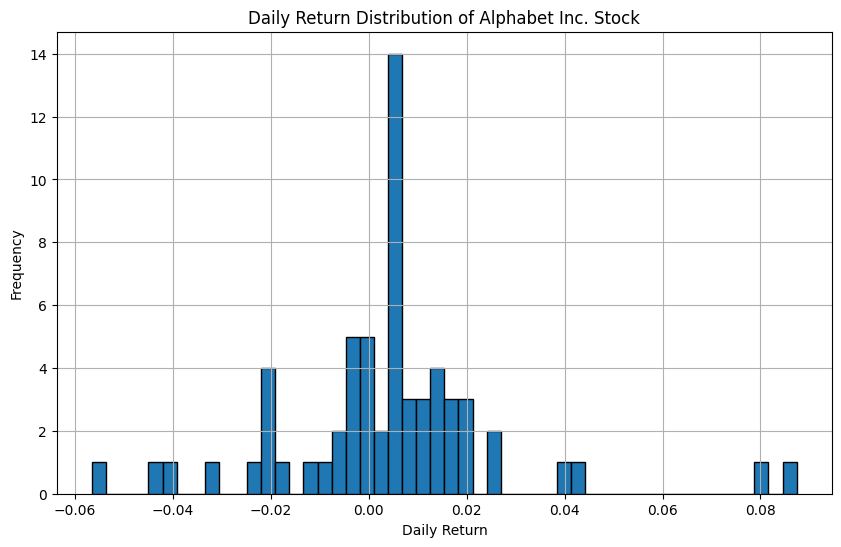

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('alphabet.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

start_date = '2020-04-01'
end_date = '2020-06-30'
filtered_data = data.loc[start_date:end_date]

filtered_data['Daily Return'] = filtered_data['Close'].pct_change()

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Daily Return'].dropna(), bins=50, edgecolor='black')
plt.title('Daily Return Distribution of Alphabet Inc. Stock')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Pandas Performance optimization

#### 14. Write a Pandas program to compare the performance of calculating the cumulative sum of a column using the "cumsum" method vs. using a "for" loop.

In [52]:
import pandas as pd
import time

data = pd.DataFrame({'Values': range(1, 1000001)})

start_time = time.perf_counter()
cumsum_result = data['Values'].cumsum()
end_time = time.perf_counter()
cumsum_time = end_time - start_time

start_time = time.perf_counter()
for_loop_result = [data['Values'].iloc[0]]
for i in range(1, len(data)):
    for_loop_result.append(for_loop_result[i-1] + data['Values'].iloc[i])
end_time = time.perf_counter()
for_loop_time = end_time - start_time

print(f"Time taken using 'cumsum': {cumsum_time:.6f} seconds")
print(f"Time taken using 'for' loop: {for_loop_time:.6f} seconds")
print(f"Are the results equal? {cumsum_result.equals(pd.Series(for_loop_result))}")


Time taken using 'cumsum': 0.005042 seconds
Time taken using 'for' loop: 7.082325 seconds
Are the results equal? True


# Advanced indexing and slicing

#### 15. Write a Pandas program that uses MultiIndex to select data based on conditions.

In [66]:
import pandas as pd

data = {
    'Store': ['Store_A', 'Store_A', 'Store_B', 'Store_B', 'Store_C', 'Store_C'],
    'Month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
    'Sales': [2000, 2200, 3000, 3500, 4500, 4700]
}

df = pd.DataFrame(data)
df.set_index(['Store', 'Month'], inplace=True)

print("Original DataFrame:")
print(df)

sales_store_a_february = df.loc[('Store_A', 'Feb')]
print("\nSales for Store_A in February:", sales_store_a_february)


Original DataFrame:
               Sales
Store   Month       
Store_A Jan     2000
        Feb     2200
Store_B Jan     3000
        Feb     3500
Store_C Jan     4500
        Feb     4700

Sales for Store_A in February: Sales    2200
Name: (Store_A, Feb), dtype: int64


# Sql database queries

#### 3. Write a Pandas program to extract first 7 records from employees file.

In [72]:
import pandas as pd

employees = pd.read_csv('emp.csv') 

first_7_records = employees.head(7)

print(first_7_records)


   EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER   HIRE_DATE  \
0          100     Steven       King     SKING  515.123.4567  2003-06-17   
1          101      Neena    Kochhar  NKOCHHAR  515.123.4568  2005-09-21   
2          102        Lex    De Haan   LDEHAAN  515.123.4569  2001-01-13   
3          103  Alexander     Hunold   AHUNOLD  590.423.4567  2006-01-03   
4          104      Bruce      Ernst    BERNST  590.423.4568  2007-05-21   
5          105      David     Austin   DAUSTIN  590.423.4569  2005-06-25   
6          106      Valli  Pataballa  VPATABAL  590.423.4560  2006-02-05   

    JOB_ID   SALARY  COMMISSION_PCT  MANAGER_ID  DEPARTMENT_ID  
0  AD_PRES  24000.0             0.0           0             90  
1    AD_VP  17000.0             0.0         100             90  
2    AD_VP  17000.0             0.0         100             90  
3  IT_PROG   9000.0             0.0         102             60  
4  IT_PROG   6000.0             0.0         103             60  
5

#### 24. Write a Pandas program to display the first and last name and date of joining of the employees who is either Sales Representative or Sales Man.



In [79]:
import pandas as pd

df = pd.read_csv('emp.csv', on_bad_lines='skip', low_memory = False)
filtered_df = df[df['JOB_ID'].isin(['SA_REP', 'SA_MAN'])]
result = filtered_df[['FIRST_NAME', 'LAST_NAME', 'HIRE_DATE']]
print(result)


      FIRST_NAME LAST_NAME   HIRE_DATE
11   Christopher    Harris  2003-11-05
12         Susan     Young  2005-07-07
13         Larry    Thomas  2006-02-01
14        Sandra     Moore  2008-06-22
15          Paul    Martin  2006-04-03
..           ...       ...         ...
131      Lillian   Roberts  2007-07-20
132         John    Wilson  2006-03-22
133   Jacqueline     Adams  2004-09-19
134      Charles     Moore  2007-03-25
135       Thomas   Jackson  2005-10-08

[91 rows x 3 columns]


# Resampling

#### 15. Write a Pandas program to calculate percentage change in Resampled data.

In [83]:
import pandas as pd

data = {
    'date': ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05', 
             '2025-01-06', '2025-01-07'],
    'value': [100, 110, 120, 115, 130, 140, 150]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
resampled_df = df.resample('D').mean()
percentage_change = resampled_df.pct_change() * 100

print(percentage_change)


                value
date                 
2025-01-01        NaN
2025-01-02  10.000000
2025-01-03   9.090909
2025-01-04  -4.166667
2025-01-05  13.043478
2025-01-06   7.692308
2025-01-07   7.142857


# Advanced Grouping and Aggregation

#### 15. Write a Pandas program to apply multiple aggregations with named functions in GroupBy for detailed data analysis.

In [87]:
import pandas as pd

data = {
    'Department': ['Sales', 'Sales', 'IT', 'IT', 'HR', 'HR'],
    'Employee': ['John', 'Anna', 'Peter', 'Linda', 'James', 'Robert'],
    'Salary': [50000, 60000, 70000, 80000, 55000, 60000],
    'Experience': [5, 6, 8, 7, 4, 3]
}

df = pd.DataFrame(data)

grouped = df.groupby('Department').agg(
    total_salary=('Salary', 'sum'),
    average_salary=('Salary', 'mean'),
    total_experience=('Experience', 'sum'),
    average_experience=('Experience', 'mean')
)

print(grouped)


            total_salary  average_salary  total_experience  average_experience
Department                                                                    
HR                115000         57500.0                 7                 3.5
IT                150000         75000.0                15                 7.5
Sales             110000         55000.0                11                 5.5


# IMDb Movie Queries

#### 17. Write a Pandas program to display the movies (title, number of votes) that received specified number of votes.

In [91]:
import pandas as pd

data = {
    'Movie': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E'],
    'Votes': [1500, 2000, 1500, 3000, 1500]
}

df = pd.DataFrame(data)

specified_votes = 1500
filtered_df = df[df['Votes'] == specified_votes]

print(filtered_df[['Movie', 'Votes']])


     Movie  Votes
0  Movie A   1500
2  Movie C   1500
4  Movie E   1500


# Mastering numpy

#### 13. Calculate the mean of values in each row.

In [97]:
import pandas as pd
data = {'X': [1, 2, 3], 'Y': [4, 5, 6]}
df = pd.DataFrame(data)
print(df.mean(axis=1))

0    2.5
1    3.5
2    4.5
dtype: float64


# Pandas Practice Set-1

#### 57. Write a Pandas program to read rows in positions 0 through 4 (exclusive) and all columns of diamonds DataFrame.

In [101]:
import pandas as pd

diamonds = pd.read_csv('diamond.csv')

subset_df = diamonds.iloc[0:4, :]

print(subset_df)


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63


#### 63. Write a Pandas program to get sample 75% of the diamonds DataFrame's rows without replacement and store the remaining 25% of the rows in another DataFrame.

In [106]:
import pandas as pd

diamonds = pd.read_csv('diamond.csv')

sampled_df = diamonds.sample(frac=0.75, random_state=42)
remaining_df = diamonds.drop(sampled_df.index)

print("Sampled DataFrame (75%):")
print(sampled_df)
print("\nRemaining DataFrame (25%):")
print(remaining_df)


Sampled DataFrame (75%):
       carat        cut color clarity  depth  table  price     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0    559  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0   2201  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0   1238  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0   1304  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0   6901  7.44  7.37  4.61
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
48565   0.50       Good     G    VVS2   64.4   57.0   1991  4.97  5.05  3.22
12312   1.24      Ideal     I     SI2   61.9   57.0   5221  6.87  6.92  4.27
18130   1.51    Premium     H     SI2   60.2   62.0   7340  7.43  7.38  4.46
39846   0.51  Very Good     F     SI2   62.7   56.0   1100  5.07  5.10  3.19
9114    1.02  Very Good     I     VS2   59.3   59.0   4532  6.56  6.60  3.90

[40455 rows x 10 columns]

Remaining DataFrame (25

#### 38. Write a Pandas program to create a bar plot of the 'value_counts' for the 'cut' series of diamonds DataFrame.

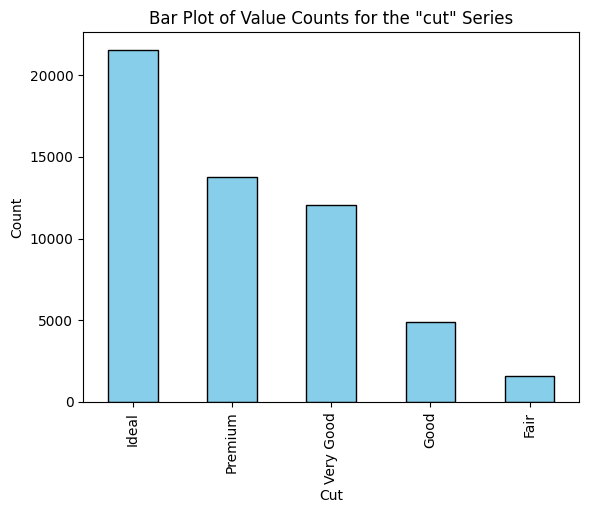

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

diamonds = pd.read_csv('diamond.csv')
cut_counts = diamonds['cut'].value_counts()
cut_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Bar Plot of Value Counts for the "cut" Series')
plt.xlabel('Cut')
plt.ylabel('Count')

plt.show()
